In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers

Using TensorFlow backend.


In [3]:
mnist = keras.datasets.mnist
(mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y)\
    = mnist.load_data()
def MNIST_To_CIFAR_FORM(mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y):
    """
    Change the one-channel to RBG-channel on mnist_train_x and mnist_test_x
    Change the shape of mnist_train_y and mnist_test_y from (length) to (length,1)
    ---------------------------------------
    inputs:
    mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y which is all multi-dimension array
    It is recommended to use the following way to import the data
    ========================== codes ==========================
    mnist = keras.datasets.mnist
    (mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y)\
    = mnist.load_data()
    ========================== codes ==========================
    outputs:
    mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y 
    """
    from skimage import exposure
    import imutils
    B= []
    for i in range(len(mnist_train_x)):
        A = mnist_train_x[i]
        A = exposure.rescale_intensity(A, out_range=(0, 255))
        A = imutils.resize(A, width=32)
        B.append(A)
    B = np.array(B)

    mnist_train_RGB_x = np.repeat(B[:,:, :, np.newaxis], 3, axis=3)
    B= []
    for i in range(len(mnist_test_x)):
        A = mnist_test_x[i]
        A = exposure.rescale_intensity(A, out_range=(0, 255))
        A = imutils.resize(A, width=32)
        B.append(A)
    B = np.array(B)

    mnist_test_RGB_x = np.repeat(B[:,:, :, np.newaxis], 3, axis=3)
    M_train_y = np.array([[mnist_train_y[i]] for i in range(len(mnist_train_y))])
    M_test_y = np.array([[mnist_test_y[i]] for i in range(len(mnist_test_y))])
    return mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y
mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y = MNIST_To_CIFAR_FORM(mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y)

In [4]:
class MNIST_vgg:
    def __init__(self,train=True):
        self.num_classes = 10
        self.weight_decay = 0.0005
        self.x_shape = [32,32,3]

        self.model = self.build_model()
        if train:
            self.model = self.train(self.model)
        else:
            self.model.load_weights('MNIST_vgg.h5')


    def build_model(self):
        # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

        model = Sequential()
        weight_decay = self.weight_decay

        model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=self.x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Dropout(0.5))
        model.add(Dense(self.num_classes))
        model.add(Activation('softmax'))
        return model


    def normalize(self,X_train,X_test):
        #this function normalize inputs for zero mean and unit variance
        # it is used when training a model.
        # Input: training set and test set
        # Output: normalized training set and test set according to the trianing set statistics.
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test

    def normalize_production(self,x):
        #this function is used to normalize instances in production according to saved training set statistics
        # Input: X - a training set
        # Output X - a normalized training set according to normalization constants.

        #these values produced during first training and are general for the standard cifar10 training set normalization
        mean = 120.707
        std = 64.15
        return (x-mean)/(std+1e-7)

    def predict(self,x,normalize=True,batch_size=50):
        if normalize:
            x = self.normalize_production(x)
        return self.model.predict(x,batch_size)

    def train(self,model):

        #training parameters
        batch_size = 128
        maxepoches = 25
        learning_rate = 0.1
        lr_decay = 1e-6
        lr_drop = 20
        # The data, shuffled and split between train and test sets:
        x_train,y_train,x_test,y_test = mnist_train_RGB_x,M_train_y,mnist_test_RGB_x,M_test_y
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train, x_test = self.normalize(x_train, x_test)

        y_train = keras.utils.to_categorical(y_train, self.num_classes)
        y_test = keras.utils.to_categorical(y_test, self.num_classes)

        def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
        reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

        #data augmentation
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)



        #optimization details
        sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


        # training process in a for loop with learning rate drop every 25 epoches.

        historytemp = model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=maxepoches,
                            validation_data=(x_test, y_test),callbacks=[reduce_lr],verbose=2)
        model.save_weights('MNIST_vgg.h5')
        return model
 

In [20]:
fp = open("MNIST-VGG-3.pkl","rb+")
M_VGG_Model3 = pickle.load(fp, encoding='bytes')
fp = open("M_representation_uniform, normal, Omniglot.pkl","rb+")
M_representation_others = pickle.load(fp, encoding='bytes')
fp = open("M_representation.pkl","rb+")
M_representation = pickle.load(fp, encoding='bytes')

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
def get_the_orignal_index_after_ranking(arr, isReverse = True):
    """
    This function return the orignal index of the after the array is sorted
    inputs:
    arr || one dimension list or ndarray
    isReverse || boolean, if it is "True" the rank is decending; if it is "False" the rank is ascending 
    outputs:
    A || an arr including the orignal index before ranking
    ========================= examples =========================
    For example, arr = [4,7,2,9]
    we have the mapping relationship:
    index    value
      0        4
      1        7
      2        2
      3        9
    After sorting, say decendingly, we have:
    orignal_index     value
      3                 9
      1                 7
      0                 4
      2                 2    
    the result is for this function is [3,1,0,2].
    """
    import operator
    similarity_dict = dict(zip(list(range(len(arr))),arr))
    sorted_similarity_dict = sorted(similarity_dict.items(), reverse=isReverse, key=operator.itemgetter(1))
    A = [sorted_similarity_dict[i][0] for i in range(len(arr))]
    return A

In [7]:
def find_idx(arr, target):
    ans = []
    for i in range(len(arr)):
        if arr[i] == target:
            ans.append(i)
    return ans
def get_submax(arr):
    arr = np.array(arr)
    MAX = np.max(arr)
    idx = find_idx(arr, MAX)
    arr_without_max = np.delete(arr,idx)
    return np.max(arr_without_max)
def find_statistics(Prob_Mat):
    Prob_diff = []
    MAX_Prob_Mat = []
    MAX_Prob_Mat_idx = []
    subMAX_Prob_Mat = []
    subMAX_Prob_Mat_idx = []
    for i in range(len(Prob_Mat)):
        MAX = np.max(Prob_Mat[i])
        MAX_idx = find_idx(Prob_Mat[i], MAX)[0]
        subMAX = get_submax(Prob_Mat[i])
        subMAX_idx = find_idx(Prob_Mat[i], subMAX)[0]
        prob_difference = MAX - subMAX
        Prob_diff.append(prob_difference)
        MAX_Prob_Mat.append(MAX)
        subMAX_Prob_Mat.append(subMAX)
        MAX_Prob_Mat_idx.append(MAX_idx)
        subMAX_Prob_Mat_idx.append(subMAX_idx)
    return Prob_diff,MAX_Prob_Mat,MAX_Prob_Mat_idx,subMAX_Prob_Mat,subMAX_Prob_Mat_idx
def separate_one_class(target_class_label, x_train, y_train, x_test, y_test):
    with_train_idx = find_idx(y_train, target_class_label)
    with_test_idx = find_idx(y_test, target_class_label)
    without_train_idx = list(set(range(len(y_train))).difference(set(with_train_idx)))
    without_test_idx = list(set(range(len(y_test))).difference(set(with_test_idx)))
    with_train = x_train[with_train_idx]
    with_test = x_test[with_test_idx]
    without_train = x_train[without_train_idx]
    without_test = x_test[without_test_idx]
    with_train_y = y_train[with_train_idx]
    with_test_y = y_test[with_test_idx]
    without_train_y = y_train[without_train_idx]
    without_test_y = y_test[without_test_idx]
    return with_train, with_train_y, without_train, without_train_y, with_test, with_test_y, without_test, without_test_y
def minkowski_distance(x,y,n):
    if np.isinf(n):
        if n>0:
            return np.max(np.abs(x-y))
        else:
            return np.min(np.abs(x-y))
    else:
        return np.power(np.sum(np.power(np.abs(x-y),n)),1/n)
def minkowski_similarity(x,Y,n):
    arr = []
    for y in Y:
        arr.append(minkowski_distance(x,y,n))
    return np.array(arr)

def get_KNN_stats(k,testarr_one_sample, testarr_waiting_to_compare, 
                  testarr_waiting_to_compare_label, Model, similarity_method = 'cosine_similarity', minkowski_power = 2):
    """
    Inputs Example:
    k = 50
    testarr_one_sample = [mnist_train_RGB_x[0]]
    testarr_waiting_to_compare = [C_x_train[i] for i in range(5000)]
    testarr_waiting_to_compare_label = C_y_train[:5000].reshape(5000)
    Model = C_VGG_Model1.model
    
    Inputs:
    k: int, the number of the nearest neighbour
    testarr_one_sample: multi-dimensional ndarray, shape = (1,num_pixel_x,num_pixel_y,num_channel)
    testarr_waiting_to_compare_label: multi-dimensional ndarray, shape = (num_neighbour_candidate,num_pixel_x,num_pixel_y,num_channel)
    testarr_waiting_to_compare_label: one-dimensional ndarray, shape = (num_neighbour_candidate,)
    Model: keras backend model
    similarity_method: String, 'cosine_similarity', 'minkowski_similarity'. Default = 'cosine_similarity'
    minkowski_power: int, the p-value in the minkowski_distance. Only useful when similarity_method = 'minkowski_similarity'
    
    Outputs:
    similarity: one-dimensional ndarray, shape = (num_neighbour_candidate,)
    K_nearest_neighbour_orignal_label: one-dimensional ndarray, shape = (k,)
    K_nearest_neighbour: multi-dimensional ndarray, shape = (k,num_pixel_x,num_pixel_y,num_channel)
    KNN_oringal_class: dictionary, counts of the orignal class
    max_ratio_KNN_from_one_class: float, the max of the ratio of KNN are from one class
    """
    from keras import backend as K
    testarr_waiting_to_compare = np.array(testarr_waiting_to_compare)
    inp = Model.model.input                                           # input placeholder
    outputs = Model.model.layers[55].output          # all layer outputs
    functors = K.function([inp, K.learning_phase()], [outputs])   # evaluation functions

    # Testing
    test1 = testarr_one_sample
    layer_outs_one_sample = functors([test1, 0.])
    layer_outs_one_sample = np.array(layer_outs_one_sample)[0]

    test2 = testarr_waiting_to_compare
    layer_outs_waiting_to_compare = functors([test2, 0.])
    layer_outs_waiting_to_compare = np.array(layer_outs_waiting_to_compare)[0]
    if similarity_method == 'cosine_similarity':
        from sklearn.metrics.pairwise import cosine_similarity
        similarity = cosine_similarity(layer_outs_one_sample, layer_outs_waiting_to_compare)
        similarity = np.array(similarity[0])
        K_nearest_neighbour_orignal_label = get_the_orignal_index_after_ranking(similarity)[:k]
    elif similarity_method == 'minkowski_similarity':
        similarity = minkowski_similarity(layer_outs_one_sample, layer_outs_waiting_to_compare, minkowski_power)
        K_nearest_neighbour_orignal_label = get_the_orignal_index_after_ranking(similarity, isReverse = False)[:k]
    else:
        raise Exception("invalid similarity method")
    K_nearest_neighbour_orignal_label = np.array(K_nearest_neighbour_orignal_label)
    K_nearest_neighbour = testarr_waiting_to_compare[K_nearest_neighbour_orignal_label]
    from collections import Counter
    KNN_oringal_class = Counter(testarr_waiting_to_compare_label[K_nearest_neighbour_orignal_label])
    max_ratio_KNN_from_one_class = max(KNN_oringal_class.values())/k
    import operator
    max_KNN_class_label = max(KNN_oringal_class.items(), key=operator.itemgetter(1))[0]
    return similarity, K_nearest_neighbour_orignal_label, K_nearest_neighbour, KNN_oringal_class, max_ratio_KNN_from_one_class, max_KNN_class_label

In [8]:
def show(columns,rows,arr):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, columns*rows +1):
        img = arr[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    return

In [9]:
def compare_representations(testarr_one_sample, testarr_waiting_to_compare,testarr_waiting_to_compare_label, MODEL, similarity_method = 'minkowski_similarity', minkowski_power = 2):
    arr_KNN_from_same_class_ratio = []
    arr_KNN_max_class_label = []
    arr_KNN_similarity = []
    testarr_waiting_to_compare = testarr_waiting_to_compare[:5000]
    testarr_waiting_to_compare_label = testarr_waiting_to_compare_label[:5000].reshape(5000)
    for j in range(500):
        print("current sample: ", j)
        k = 50
        testarr_one_sample_1 = [testarr_one_sample[j]]
        result_l2 = get_KNN_stats(k,testarr_one_sample_1, testarr_waiting_to_compare, 
                  testarr_waiting_to_compare_label, MODEL, similarity_method = 'minkowski_similarity', minkowski_power = 2)
        arr_KNN_from_same_class_ratio.append(result_l2[4])
        arr_KNN_max_class_label.append(result_l2[5])
        arr_KNN_similarity.append(sorted(result_l2[0],reverse = False))
    pred_labels = MODEL.predict(testarr_one_sample[:500])
    import pandas as pd
    df = pd.DataFrame({'arr_KNN_max_class_label':arr_KNN_max_class_label,
                   'arr_KNN_from_same_class_ratio':arr_KNN_from_same_class_ratio,
                   'predicted_label':find_statistics(pred_labels)[2],
                  'predicted_prob':find_statistics(pred_labels)[1],})
    return arr_KNN_similarity, arr_KNN_from_same_class_ratio, arr_KNN_max_class_label, df

In [10]:
def shape(List):
    return np.array(List).shape

In [11]:
def get_KNN_stats_new(k,testarr_one_sample, testarr_waiting_to_compare, testarr_waiting_to_compare_label, similarity_method = 'cosine_similarity', minkowski_power = 2):
    """
    Inputs Example:
    k = 50
    testarr_one_sample = [mnist_train_RGB_x[0]]
    testarr_waiting_to_compare = [C_x_train[i] for i in range(5000)]
    testarr_waiting_to_compare_label = C_y_train[:5000].reshape(5000)
    Model = C_VGG_Model1.model
    
    Inputs:
    k: int, the number of the nearest neighbour
    testarr_one_sample: multi-dimensional ndarray, shape = (1,num_pixel_x,num_pixel_y,num_channel)
    testarr_waiting_to_compare_label: multi-dimensional ndarray, shape = (num_neighbour_candidate,num_pixel_x,num_pixel_y,num_channel)
    testarr_waiting_to_compare_label: one-dimensional ndarray, shape = (num_neighbour_candidate,)
    Model: keras backend model
    similarity_method: String, 'cosine_similarity', 'minkowski_similarity'. Default = 'cosine_similarity'
    minkowski_power: int, the p-value in the minkowski_distance. Only useful when similarity_method = 'minkowski_similarity'
    
    Outputs:
    similarity: one-dimensional ndarray, shape = (num_neighbour_candidate,)
    K_nearest_neighbour_orignal_label: one-dimensional ndarray, shape = (k,)
    K_nearest_neighbour: multi-dimensional ndarray, shape = (k,num_pixel_x,num_pixel_y,num_channel)
    KNN_oringal_class: dictionary, counts of the orignal class
    max_ratio_KNN_from_one_class: float, the max of the ratio of KNN are from one class
    """
    if similarity_method == 'cosine_similarity':
        from sklearn.metrics.pairwise import cosine_similarity
        similarity = cosine_similarity(testarr_one_sample, testarr_waiting_to_compare)
        similarity = np.array(similarity[0])
        K_nearest_neighbour_orignal_label = get_the_orignal_index_after_ranking(similarity)[:k]
    elif similarity_method == 'minkowski_similarity':
        similarity = minkowski_similarity(testarr_one_sample, testarr_waiting_to_compare, minkowski_power)
        K_nearest_neighbour_orignal_label = get_the_orignal_index_after_ranking(similarity, isReverse = False)[:k]
    else:
        raise Exception("invalid similarity method")
    K_nearest_neighbour_orignal_label = np.array(K_nearest_neighbour_orignal_label)
    K_nearest_neighbour = testarr_waiting_to_compare[K_nearest_neighbour_orignal_label]
    from collections import Counter
    KNN_oringal_class = Counter(testarr_waiting_to_compare_label[K_nearest_neighbour_orignal_label])
    max_ratio_KNN_from_one_class = max(KNN_oringal_class.values())/k
    import operator
    max_KNN_class_label = max(KNN_oringal_class.items(), key=operator.itemgetter(1))[0]
    return similarity, K_nearest_neighbour_orignal_label, K_nearest_neighbour, KNN_oringal_class, max_ratio_KNN_from_one_class, max_KNN_class_label

In [12]:
def compare_representations(testarr_one_sample, testarr_waiting_to_compare,testarr_waiting_to_compare_label, MODEL, similarity_method = 'minkowski_similarity', minkowski_power = 2):
    arr_KNN_from_same_class_ratio = []
    arr_KNN_max_class_label = []
    arr_KNN_similarity = []
    testarr_waiting_to_compare = testarr_waiting_to_compare
    testarr_waiting_to_compare_label = testarr_waiting_to_compare_label.reshape(len(testarr_waiting_to_compare_label))
    for j in range(500):
        if j%50 == 0:
            print("current sample: ", j)
        k = 50
        testarr_one_sample_1 = [testarr_one_sample[j]]
        result_l2 = get_KNN_stats_new(k,testarr_one_sample_1, testarr_waiting_to_compare, 
                  testarr_waiting_to_compare_label, similarity_method = 'minkowski_similarity', minkowski_power = 2)
        arr_KNN_from_same_class_ratio.append(result_l2[4])
        arr_KNN_max_class_label.append(result_l2[5])
        arr_KNN_similarity.append(sorted(result_l2[0],reverse = False))
    #pred_labels = MODEL.predict(testarr_one_sample[:500])
    return arr_KNN_similarity, arr_KNN_from_same_class_ratio, arr_KNN_max_class_label

In [15]:
M_representation_result_ODu = compare_representations(M_representation_others["uniform"],M_representation["MNIST_train"],M_train_y,M_VGG_Model3)

current sample:  0
current sample:  50
current sample:  100
current sample:  150
current sample:  200
current sample:  250
current sample:  300
current sample:  350
current sample:  400
current sample:  450


In [13]:
M_representation_result_ODn = compare_representations(M_representation_others["normal"],M_representation["MNIST_train"],M_train_y,M_VGG_Model3)

current sample:  0
current sample:  50
current sample:  100
current sample:  150
current sample:  200
current sample:  250
current sample:  300
current sample:  350
current sample:  400
current sample:  450


In [14]:
M_representation_result_ODO = compare_representations(M_representation_others["Omniglot_RBG"],M_representation["MNIST_train"],M_train_y,M_VGG_Model3)

current sample:  0
current sample:  50
current sample:  100
current sample:  150
current sample:  200
current sample:  250
current sample:  300
current sample:  350
current sample:  400
current sample:  450


In [15]:
import pickle
pickle.dump(M_representation_result_ODu, open("M_representation_result_ODu.pkl", "wb"))
pickle.dump(M_representation_result_ODn, open("M_representation_result_ODn.pkl", "wb"))
pickle.dump(M_representation_result_ODO, open("M_representation_result_ODO.pkl", "wb"))
#pickle.dump(df_M_0_8_representation_result_ID08, open("df_M_0_8_representation_result_ID08.pkl", "wb"))

In [16]:
def concact_results(one_sample,arr_KNN_from_same_class_ratio, arr_KNN_max_class_label,MODEL):
    pred_labels = MODEL.predict(one_sample[:500])
    import pandas as pd
    df = pd.DataFrame({'arr_KNN_max_class_label':arr_KNN_max_class_label,
                   'arr_KNN_from_same_class_ratio':arr_KNN_from_same_class_ratio,
                   'predicted_label':find_statistics(pred_labels)[2],
                  'predicted_prob':find_statistics(pred_labels)[1],})
    return df

In [17]:
def consistency_of_df(df, upper_bound, lower_bound):
    return len(df[df['arr_KNN_from_same_class_ratio']>upper_bound][df['arr_KNN_max_class_label'] == df['predicted_label']])/len(df[df['arr_KNN_from_same_class_ratio']>upper_bound]), len(df[df['arr_KNN_from_same_class_ratio']<lower_bound][df['arr_KNN_max_class_label'] == df['predicted_label']])/len(df[df['arr_KNN_from_same_class_ratio']<lower_bound])

In [18]:
import numpy as np
np.random.seed(0)
normal = np.random.randn(10000,32,32,3)
uniform = np.random.uniform(0,1,[10000,32,32,3])
# load Omniglot
import scipy.io as sio
import scipy.misc as scimisc

# other alphabets have characters which overlap
safe_list = [0,2,5,6,8,12,13,14,15,16,17,18,19,21,26]
m = sio.loadmat("./data_background.mat")

squished_set = []
for safe_number in safe_list:
    for alphabet in m['images'][safe_number]:
        for letters in alphabet:
            for letter in letters:
                for example in letter:
                    squished_set.append(scimisc.imresize(1 - example[0], (28,28)).reshape(1, 28, 28))

omni_images = np.concatenate(squished_set, axis=0)

def MNIST_To_CIFAR_FORM_only_x(mnist_x):
    """
    Change the one-channel to RBG-channel on mnist_x and mnist_test_x
    ---------------------------------------
    inputs:
    mnist_x
    It is recommended to use the following way to import the data
    ========================== codes ==========================
    mnist = keras.datasets.mnist
    (mnist_x, mnist_train_y), (mnist_test_x, mnist_test_y)\
    = mnist.load_data()
    ========================== codes ==========================
    outputs:
    mnist_RGB_x 
    """
    from skimage import exposure
    import imutils
    B= []
    for i in range(len(mnist_x)):
        A = mnist_x[i]
        A = exposure.rescale_intensity(A, out_range=(0, 255))
        A = imutils.resize(A, width=32)
        B.append(A)
    B = np.array(B)

    mnist_RGB_x = np.repeat(B[:,:, :, np.newaxis], 3, axis=3)
    return mnist_RGB_x 
Omniglot_RBG = MNIST_To_CIFAR_FORM_only_x(omni_images)

c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


In [21]:
df_M_representation_result_ODu = concact_results(uniform,M_representation_result_ODu[1],M_representation_result_ODu[2],M_VGG_Model3)

UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node activation_1/Relu}}]]
	 [[activation_15/Softmax/_1119]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node activation_1/Relu}}]]
0 successful operations.
0 derived errors ignored.

In [ ]:
df_M_representation_result_ODn = concact_results(normal,M_representation_result_ODn[1],M_representation_result_ODn[2],M_VGG_Model3)

In [ ]:
df_M_representation_result_ODO = concact_results(Omniglot_RBG,M_representation_result_ODO[1],M_representation_result_ODO[2],M_VGG_Model3)

In [28]:
df_M_0_8_representation_result_OD9[df_M_0_8_representation_result_OD9['arr_KNN_from_same_class_ratio']>0.7]

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
0,1,0.96,4,0.779246
1,8,0.96,4,0.394128
7,1,0.86,4,0.983009
8,1,0.78,4,0.734795
9,5,0.96,5,0.583358
11,1,1.00,4,0.735721
12,1,1.00,4,0.748191
15,1,0.98,4,0.810133
16,1,0.96,4,0.918515
19,7,0.98,7,0.924085


In [31]:
df_M_0_8_representation_result_OD9[df_M_0_8_representation_result_OD9['arr_KNN_from_same_class_ratio']<0.4]

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
2,6,0.32,4,0.831224
5,8,0.34,4,0.385660
6,2,0.22,4,0.635771
13,8,0.28,7,0.940748
34,0,0.38,4,0.796542
42,1,0.38,4,0.635101
45,2,0.26,7,0.936760
52,8,0.28,7,0.915929
54,8,0.30,7,0.975624
58,0,0.32,4,0.285626


In [26]:
df_M_0_8_representation_result_ID08

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
0,7,1.00,7,0.995818
1,2,0.92,2,0.985263
2,1,0.94,1,0.849739
3,0,1.00,0,0.997723
4,4,1.00,4,0.999044
5,1,1.00,1,0.970869
6,4,1.00,4,0.997948
7,2,0.36,5,0.793249
8,0,1.00,0,0.999009
9,6,1.00,6,0.886852


In [32]:
df_M_0_8_representation_result_ID08[df_M_0_8_representation_result_ID08['arr_KNN_from_same_class_ratio']<0.4]

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
7,2,0.36,5,0.793249
201,8,0.28,4,0.798814
207,8,0.28,3,0.965807
249,1,0.26,2,0.888290
414,2,0.30,2,0.302892
420,8,0.30,7,0.989823
421,8,0.36,5,0.765115
471,3,0.28,3,0.792731
494,7,0.30,4,0.606832


In [33]:
df_M_0_8_representation_result_ID08[df_M_0_8_representation_result_ID08['arr_KNN_from_same_class_ratio']>0.7]

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
0,7,1.00,7,0.995818
1,2,0.92,2,0.985263
2,1,0.94,1,0.849739
3,0,1.00,0,0.997723
4,4,1.00,4,0.999044
5,1,1.00,1,0.970869
6,4,1.00,4,0.997948
8,0,1.00,0,0.999009
9,6,1.00,6,0.886852
10,0,1.00,0,0.994669


In [37]:
def entropy(labels, base=None):
    """ Computes entropy of label distribution. """
    from math import log, e
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    base = e if base is None else base
    for i in probs:
        ent -= i * log(i, base)

    return ent

(array([ 76.,  76.,   0.,   0.,   0., 336.,   4.,   0.,   6.,   2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

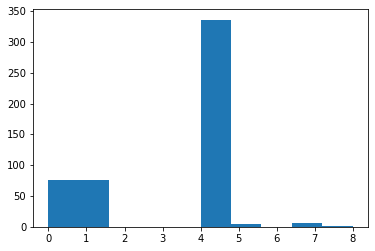

In [30]:
plt.hist(df_M_representation_result_ODC['arr_KNN_max_class_label'])

In [38]:
entropy(df_M_representation_result_ODC['arr_KNN_max_class_label'])

0.9536024062379382

(array([ 21., 134.,   7.,   1.,  71.,   5.,   3., 255.,   2.,   1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

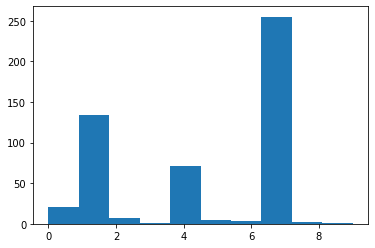

In [31]:
plt.hist(df_M_representation_result_ODC['predicted_label'])

In [39]:
entropy(df_M_representation_result_ODC['predicted_label'])

1.290070755414936

In [29]:
df_C_representation_result_ODM

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
0,9,0.20,0,0.987092
1,1,0.52,2,0.766087
2,0,0.56,0,0.999704
3,9,0.26,2,0.797273
4,9,0.22,2,0.998277
5,9,0.40,0,0.996893
6,9,0.18,2,0.999707
7,9,0.30,1,0.958599
8,9,0.30,2,0.647042
9,9,0.54,0,0.999730


In [54]:
df_C_representation_result_ODM.loc[df_C_representation_result_ODM['arr_KNN_from_same_class_ratio']>0.7]

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
21,1,0.76,2,0.783019
88,1,0.92,1,0.882425
118,1,0.92,2,0.552476
326,1,0.80,2,0.812479
352,1,0.88,5,0.988199
359,1,0.82,1,0.574194
494,1,0.78,1,0.646448


In [55]:
df_C_representation_result_IDC.loc[df_C_representation_result_IDC['arr_KNN_from_same_class_ratio']>0.7]

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
95,6,0.84,6,0.995010
96,6,0.88,6,0.999260
231,1,0.78,1,0.999959
296,6,0.88,6,0.999957
299,6,0.90,6,0.999859
311,6,0.90,6,0.999821
329,6,0.90,6,0.999586
330,1,0.78,1,0.999903
334,6,0.76,6,0.999979
369,1,0.72,1,0.999850


In [62]:
df_M_representation_result_ODC[df_M_representation_result_ODC['arr_KNN_from_same_class_ratio']<0.4]

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
2,4,0.38,7,0.993760
12,4,0.34,7,0.666899
13,0,0.32,2,0.485816
29,8,0.18,1,0.620811
32,7,0.32,7,0.827864
43,0,0.30,1,0.708303
46,1,0.36,7,0.961915
50,4,0.36,0,0.615069
68,7,0.26,7,0.983568
84,4,0.28,7,0.841327


In [61]:
df_M_representation_result_IDM[df_M_representation_result_IDM['arr_KNN_from_same_class_ratio']<0.4]

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
62,9,0.34,9,0.530925
78,0,0.34,9,0.669924
95,8,0.34,4,0.999936
97,7,0.38,7,0.999799
243,7,0.32,7,0.999830
460,2,0.34,5,0.983897
495,8,0.38,8,0.997395


(array([ 37.,  65.,  72.,  27.,   0., 113.,   0.,  33.,   0., 153.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

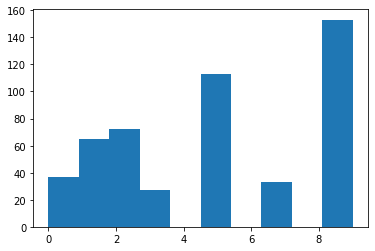

In [32]:
plt.hist(df_C_representation_result_ODM['arr_KNN_max_class_label'])

In [40]:
entropy(df_C_representation_result_ODM['arr_KNN_max_class_label'])

1.7724415658656787

(array([152.,  41., 265.,  22.,   0.,   0.,  11.,   1.,   1.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

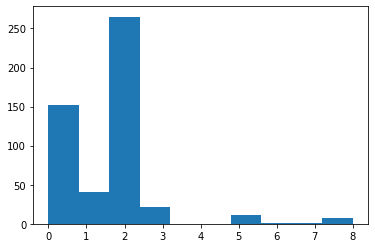

In [33]:
plt.hist(df_C_representation_result_ODM['predicted_label'])

In [41]:
entropy(df_C_representation_result_ODM['predicted_label'])

1.2095763968063684

In [43]:
M_representation_result_IDM = compare_representations(M_representation["MNIST_test"],M_representation["MNIST_train"],mnist_train_y,M_VGG_Model3)
df_M_representation_result_IDM = concact_results(mnist_test_RGB_x,M_representation_result_IDM[1],M_representation_result_IDM[2],M_VGG_Model3)

current sample:  0
current sample:  1
current sample:  2
current sample:  3
current sample:  4
current sample:  5
current sample:  6
current sample:  7
current sample:  8
current sample:  9
current sample:  10
current sample:  11
current sample:  12
current sample:  13
current sample:  14
current sample:  15
current sample:  16
current sample:  17
current sample:  18
current sample:  19
current sample:  20
current sample:  21
current sample:  22
current sample:  23
current sample:  24
current sample:  25
current sample:  26
current sample:  27
current sample:  28
current sample:  29
current sample:  30
current sample:  31
current sample:  32
current sample:  33
current sample:  34
current sample:  35
current sample:  36
current sample:  37
current sample:  38
current sample:  39
current sample:  40
current sample:  41
current sample:  42
current sample:  43
current sample:  44
current sample:  45
current sample:  46
current sample:  47
current sample:  48
current sample:  49
current sa

current sample:  396
current sample:  397
current sample:  398
current sample:  399
current sample:  400
current sample:  401
current sample:  402
current sample:  403
current sample:  404
current sample:  405
current sample:  406
current sample:  407
current sample:  408
current sample:  409
current sample:  410
current sample:  411
current sample:  412
current sample:  413
current sample:  414
current sample:  415
current sample:  416
current sample:  417
current sample:  418
current sample:  419
current sample:  420
current sample:  421
current sample:  422
current sample:  423
current sample:  424
current sample:  425
current sample:  426
current sample:  427
current sample:  428
current sample:  429
current sample:  430
current sample:  431
current sample:  432
current sample:  433
current sample:  434
current sample:  435
current sample:  436
current sample:  437
current sample:  438
current sample:  439
current sample:  440
current sample:  441
current sample:  442
current sampl

In [44]:
df_M_representation_result_IDM

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
0,7,1.00,7,0.999994
1,2,1.00,2,0.999490
2,1,1.00,1,0.999907
3,0,1.00,0,0.999972
4,4,1.00,4,0.999983
5,1,1.00,1,0.999893
6,4,0.98,4,0.999968
7,9,0.98,9,0.996378
8,2,0.70,5,0.968685
9,9,1.00,9,0.999572


In [51]:
C_representation_result_IDC = compare_representations(C_representation["CIFAR_test"],C_representation["CIFAR_train"],C_y_train,C_VGG_Model3)
df_C_representation_result_IDC = concact_results(C_x_test,C_representation_result_IDC[1],C_representation_result_IDC[2],C_VGG_Model3)

current sample:  0
current sample:  1
current sample:  2
current sample:  3
current sample:  4
current sample:  5
current sample:  6
current sample:  7
current sample:  8
current sample:  9
current sample:  10
current sample:  11
current sample:  12
current sample:  13
current sample:  14
current sample:  15
current sample:  16
current sample:  17
current sample:  18
current sample:  19
current sample:  20
current sample:  21
current sample:  22
current sample:  23
current sample:  24
current sample:  25
current sample:  26
current sample:  27
current sample:  28
current sample:  29
current sample:  30
current sample:  31
current sample:  32
current sample:  33
current sample:  34
current sample:  35
current sample:  36
current sample:  37
current sample:  38
current sample:  39
current sample:  40
current sample:  41
current sample:  42
current sample:  43
current sample:  44
current sample:  45
current sample:  46
current sample:  47
current sample:  48
current sample:  49
current sa

current sample:  396
current sample:  397
current sample:  398
current sample:  399
current sample:  400
current sample:  401
current sample:  402
current sample:  403
current sample:  404
current sample:  405
current sample:  406
current sample:  407
current sample:  408
current sample:  409
current sample:  410
current sample:  411
current sample:  412
current sample:  413
current sample:  414
current sample:  415
current sample:  416
current sample:  417
current sample:  418
current sample:  419
current sample:  420
current sample:  421
current sample:  422
current sample:  423
current sample:  424
current sample:  425
current sample:  426
current sample:  427
current sample:  428
current sample:  429
current sample:  430
current sample:  431
current sample:  432
current sample:  433
current sample:  434
current sample:  435
current sample:  436
current sample:  437
current sample:  438
current sample:  439
current sample:  440
current sample:  441
current sample:  442
current sampl

In [52]:
df_C_representation_result_IDC

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
0,9,0.34,3,0.998380
1,1,0.28,8,0.999866
2,9,0.44,8,0.999801
3,3,0.26,0,0.999574
4,6,0.36,6,0.999851
5,2,0.24,6,0.999952
6,7,0.32,1,0.999344
7,3,0.24,6,0.999454
8,4,0.30,3,0.999920
9,9,0.28,1,0.998949


In [46]:
np.random.seed(0)
rand_noise_N = np.random.rand(500,32,32,3)
rand_noise_U = np.random.uniform(0,1,(500,32,32,3))

In [56]:
C_representation_result_IDC_t = compare_representations(C_representation["CIFAR_train"],C_representation["CIFAR_train"],C_y_train,C_VGG_Model3)
df_C_representation_result_IDC_t = concact_results(C_x_train,C_representation_result_IDC_t[1],C_representation_result_IDC_t[2],C_VGG_Model3)

current sample:  0
current sample:  1
current sample:  2
current sample:  3
current sample:  4
current sample:  5
current sample:  6
current sample:  7
current sample:  8
current sample:  9
current sample:  10
current sample:  11
current sample:  12
current sample:  13
current sample:  14
current sample:  15
current sample:  16
current sample:  17
current sample:  18
current sample:  19
current sample:  20
current sample:  21
current sample:  22
current sample:  23
current sample:  24
current sample:  25
current sample:  26
current sample:  27
current sample:  28
current sample:  29
current sample:  30
current sample:  31
current sample:  32
current sample:  33
current sample:  34
current sample:  35
current sample:  36
current sample:  37
current sample:  38
current sample:  39
current sample:  40
current sample:  41
current sample:  42
current sample:  43
current sample:  44
current sample:  45
current sample:  46
current sample:  47
current sample:  48
current sample:  49
current sa

current sample:  396
current sample:  397
current sample:  398
current sample:  399
current sample:  400
current sample:  401
current sample:  402
current sample:  403
current sample:  404
current sample:  405
current sample:  406
current sample:  407
current sample:  408
current sample:  409
current sample:  410
current sample:  411
current sample:  412
current sample:  413
current sample:  414
current sample:  415
current sample:  416
current sample:  417
current sample:  418
current sample:  419
current sample:  420
current sample:  421
current sample:  422
current sample:  423
current sample:  424
current sample:  425
current sample:  426
current sample:  427
current sample:  428
current sample:  429
current sample:  430
current sample:  431
current sample:  432
current sample:  433
current sample:  434
current sample:  435
current sample:  436
current sample:  437
current sample:  438
current sample:  439
current sample:  440
current sample:  441
current sample:  442
current sampl

In [67]:
df_C_representation_result_IDC_t[df_C_representation_result_IDC_t['arr_KNN_from_same_class_ratio']>0.7]

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
39,6,0.72,3,0.947240
45,1,0.92,1,0.999913
61,1,0.88,1,0.999919
99,1,0.96,1,0.999631
117,6,0.72,6,0.999921
136,1,0.94,1,0.999910
143,6,0.98,6,0.999960
158,1,0.76,4,0.999671
160,1,0.88,1,0.999887
184,1,1.00,1,0.999962


In [68]:
df_C_representation_result_IDC_t

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob
0,6,0.28,6,0.999873
1,1,0.20,9,0.999948
2,9,0.20,9,0.999871
3,6,0.26,4,0.999891
4,1,0.62,1,0.999953
5,1,0.24,1,0.999918
6,2,0.30,2,0.999937
7,7,0.42,7,0.999960
8,8,0.20,8,0.999905
9,9,0.62,3,0.999909
